In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/into-the-future/test.csv
/kaggle/input/into-the-future/train.csv


In [12]:
import matplotlib.pyplot as plt
#from matplotlib import pyplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
from statsmodels.tsa.seasonal import seasonal_decompose 

In [3]:
df=pd.read_csv('/kaggle/input/into-the-future/train.csv') # Dataframe creation for training data
df2=pd.read_csv('/kaggle/input/into-the-future/test.csv') # Dataframe creation for testing data

When a csv file is imported as a Data Frame,the Date-time objects in the file are read as a string object. **to_datetime()** method helps to convert string Date-time into Python Date time object.

In [4]:
df['time']=pd.to_datetime(df['time'])
df2['time']=pd.to_datetime(df2['time'])

Pandas **set_index()** is a method to set a List, Series or Data frame as index of a Data Frame|

In [5]:
df = df.set_index('time')
df2 = df2.set_index('time')

Let's look at first few rows of the data.

In [160]:
df.head(7)

,id,feature_1,feature_2
time,,,
2019-03-19 00:00:00,0,735.740043,54479.540513
2019-03-19 00:00:10,1,734.102947,47888.033714
2019-03-19 00:00:20,2,730.060336,47700.882325
2019-03-19 00:00:30,3,725.609742,47790.094648
2019-03-19 00:00:40,4,724.328480,47808.402381
2019-03-19 00:00:50,5,723.715893,47810.517411
2019-03-19 00:01:00,6,720.406875,47835.758121


In [161]:
df2.head(7)

,id,feature_1
time,,
2019-03-19 01:34:00,564,423.064004
2019-03-19 01:34:10,565,423.342749
2019-03-19 01:34:20,566,423.181186
2019-03-19 01:34:30,567,421.275243
2019-03-19 01:34:40,568,422.208444
2019-03-19 01:34:50,569,422.616254
2019-03-19 01:35:00,570,425.829766


In [162]:
print(df.dtypes) # To identify the types of the data in our training set

id             int64
feature_1    float64
feature_2    float64
dtype: object


In [163]:
df.shape 

(564, 3)

The training data set consist of 564 rows and 3 columns.

In [74]:
df2.shape

(375, 2)

The test data set consist of 375 rows and 2 columns.

In [120]:
df.isnull().sum()

id           0
feature_1    0
feature_2    0
dtype: int64

There are no missing values in the training data.

# **Now let's perform some investigation on the data to discover patterns and trends in the data. We will also try to identify the outliers and anomalies.**

# **Univariate Analysis**

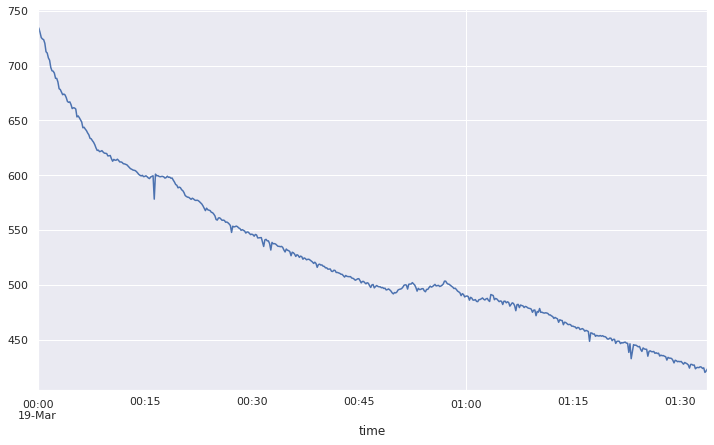

In [75]:
df['feature_1'].plot(figsize=(12,7)) # plot() function makes plots of Series or DataFrame.

# **We can observe that the values of feature_1 are decreasing over time.**

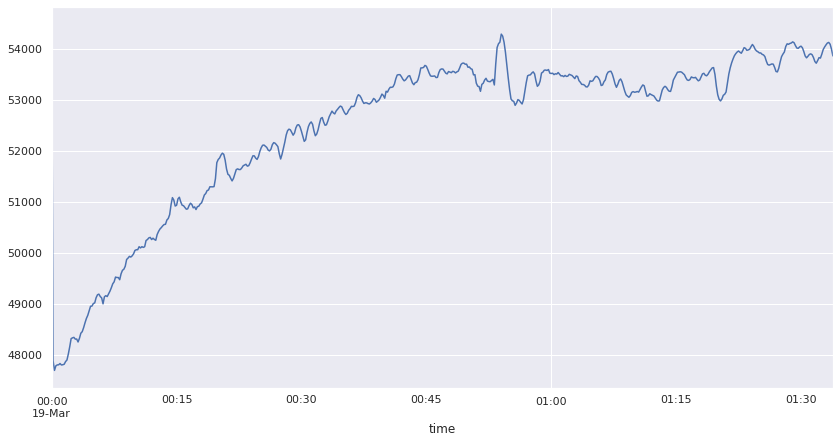

In [123]:
df['feature_2'].plot(figsize=(14,7),grid=True)

#  **We can observe that there is a steep decrease of value in the begining,then it's increasing over time.**

In [165]:
df['feature_2'].head(30)

time
2019-03-19 00:00:00    54479.540513
2019-03-19 00:00:10    47888.033714
2019-03-19 00:00:20    47700.882325
2019-03-19 00:00:30    47790.094648
2019-03-19 00:00:40    47808.402381
2019-03-19 00:00:50    47810.517411
2019-03-19 00:01:00    47835.758121
2019-03-19 00:01:10    47806.938481
2019-03-19 00:01:20    47812.099044
2019-03-19 00:01:30    47821.540514
2019-03-19 00:01:40    47873.855627
2019-03-19 00:01:50    47904.917155
2019-03-19 00:02:00    48024.051144
2019-03-19 00:02:10    48164.809903
2019-03-19 00:02:20    48324.150384
2019-03-19 00:02:30    48338.749346
2019-03-19 00:02:40    48348.049346
2019-03-19 00:02:50    48313.608189
2019-03-19 00:03:00    48315.780618
2019-03-19 00:03:10    48257.965216
2019-03-19 00:03:20    48330.197447
2019-03-19 00:03:30    48429.880576
2019-03-19 00:03:40    48459.732482
2019-03-19 00:03:50    48538.140404
2019-03-19 00:04:00    48632.973090
2019-03-19 00:04:10    48718.486888
2019-03-19 00:04:20    48780.657948
2019-03-19 00:04:30    

# **Since the first value of feature_2 can be considered as an anomaly,we will remove it .**

In [6]:
df=df.iloc[1:,] 

#   **Since we require a detail pattern of feature_2,let's look at the pattern it takes in interval of 30 minutes:**

Text(0, 0.5, 'feature_2')

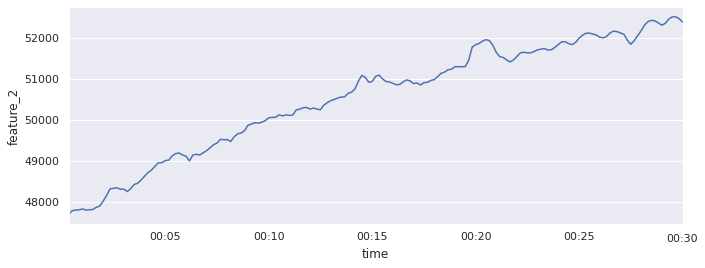

In [168]:
ax = df.loc['2019-03-19 00:00:10':'2019-03-19 00:30:00', 'feature_2'].plot()
ax.set_ylabel('feature_2')

**1. In the first 30 minutes,we can observe an increase.**

Text(0, 0.5, 'feature_2')

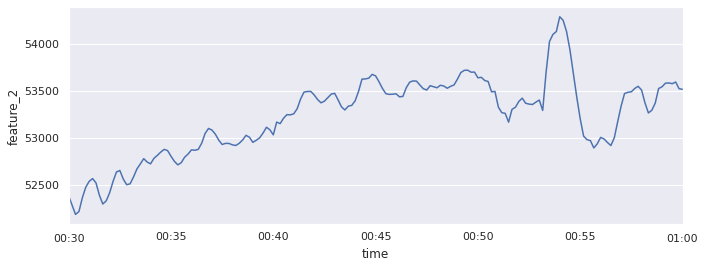

In [169]:
ax = df.loc['2019-03-19 00:30:00':'2019-03-19 01:00:00', 'feature_2'].plot()
ax.set_ylabel('feature_2')

**2. In the next 30 mins even though the value is increasing we can also observe a sharp decrease in value at specific time.**

Text(0, 0.5, 'feature_2')

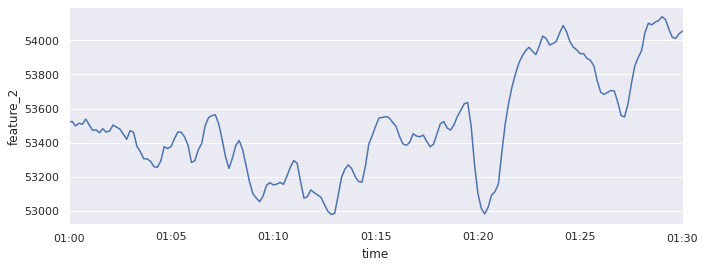

In [170]:
ax = df.loc['2019-03-19 01:00:00':'2019-03-19 01:30:00', 'feature_2'].plot(grid=True)
ax.set_ylabel('feature_2')

**3. In the last 30 mins we can see increase and decrease in values continuously.**

# **Lag Plots**
A lag plot is used to help evaluate whether the values in a dataset or time series are random. If the data are
random, the lag plot will exhibit no identifiable pattern. If the data are not random, the lag plot will demonstrate a clearly identifiable pattern.Lag plots can also help to identify outliers. 

In [80]:
from pandas.plotting import lag_plot

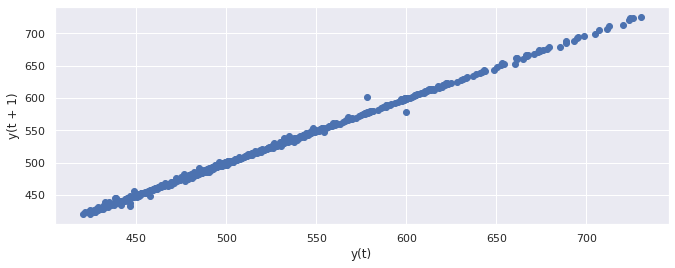

In [171]:
lag_plot(df['feature_1'],lag=1)

**We can observe that values in feature_1 have high serial correlation.**

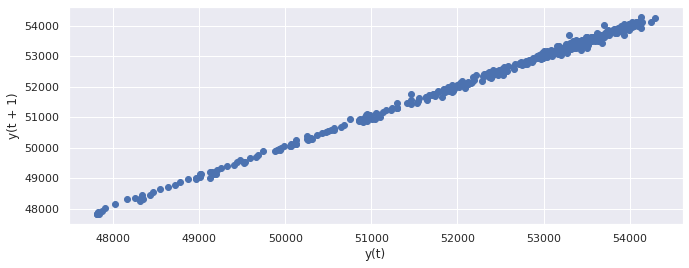

In [172]:
lag_plot(t['feature_2'],lag=1)

**We can observe that values in feature_2 have high serial correlation.**

# **Heat Map**
The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph. The goal of the heatmap is to provide a colored visual summary regarding the summary.

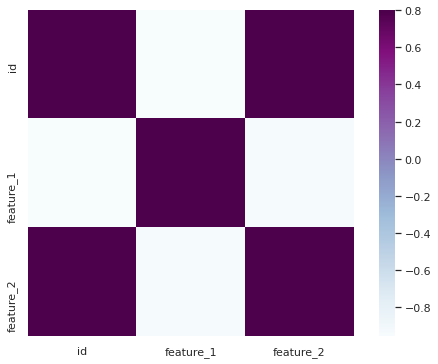

In [83]:
matrix=df.corr()
ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

**We can see that feature_1 negatively correlated with feature_2.**

Since there are no missing values and we have removed the outlier/anomalies. Let's start with Model making and prediction.
We will build several models and find the most accurate one which provieds us the best score.

# **Arima Model Making**

In [84]:
pip install pmdarima 

Note: you may need to restart the kernel to use updated packages.


In [85]:
from pmdarima import auto_arima 
from statsmodels.tsa.arima_model import ARIMA

In [86]:
import warnings 
warnings.filterwarnings("ignore") 

# **We will use the auto_arima function to get the parameters for our model.**

In [87]:
stepwise_fit = auto_arima(df['feature_2'], trace = True, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0,  
                          d = None, D = 1 ,
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True  # we don't want convergence warnings
                            
                          ) 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=7852.887, BIC=7874.446, Time=4.718 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=7870.476, BIC=7879.099, Time=0.061 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=7696.674, BIC=7713.921, Time=2.848 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=7672.747, BIC=7689.994, Time=1.880 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=7869.326, BIC=7873.638, Time=0.040 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=7721.508, BIC=7734.443, Time=0.592 seconds
Fit ARIMA(0,1,1)x(1,1,1,12) [intercept=True]; AIC=7703.872, BIC=7725.431, Time=2.145 seconds
Near non-invertible roots for order (0, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,1)x(0,1,2,12) [intercept=True]; AIC=7674.613, BIC=7696.172, Time=13.129 seconds
Fit ARIMA(0,1,1)x(1,1,0,12) [intercept=True]; AIC=76

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  564
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -3826.739
Date:                              Fri, 17 Jul 2020   AIC                           7663.478
Time:                                      08:42:24   BIC                           7685.036
Sample:                                           0   HQIC                          7671.902
                                              - 564                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9285      7.513      0.257      0.797     -12.797      16.654
ma.L1         -0.6775      0.017    -38.902      0.000      -0.712      -0.643
ma.L2          0.1739      0.008     22.279      0.000       0.159       0.189
ma.S.L12      -0.3670      0.010    -36.046      0.000      -0.387      -0.347
sigma2      8.452e+04   1790.523     47.203      0.000     8.1e+04     8.8e+04
===================================================================================
Ljung-Box (Q):                      252.47   Jarque-Bera (JB):             61224.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             3.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        54.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Lets split the train data , so that we can calculate the RMSE for our model.**

In [88]:
train = df.iloc[:len(df)-112]
test =  df.iloc[len(df)-112:]
  

from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['feature_2'],  
                order = (0,1,2),seasonal_order =(0,1,1,12))   
  
result = model.fit(trend='c') 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            feature_2   No. Observations:                  452
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -3147.549
Date:                              Fri, 17 Jul 2020   AIC                           6303.098
Time:                                      08:42:26   BIC                           6319.436
Sample:                                  03-19-2019   HQIC                          6309.543
                                       - 03-19-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7277      0.020    -36.210      0.000      -0.767      -0.688
ma.L2          0.1387      0.011     13.200      0.000       0.118       0.159
ma.S.L12      -0.9998      0.032    -31.363      0.000      -1.062      -0.937
sigma2      7.346e+04   4.35e-07   1.69e+11      0.000    7.35e+04    7.35e+04
===================================================================================
Ljung-Box (Q):                      520.83   Jarque-Bera (JB):             11956.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -2.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 

# Let's Plot the prediction

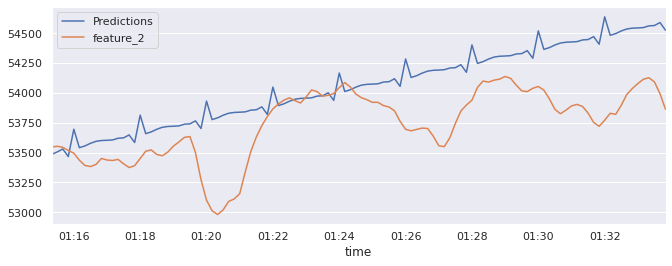

In [89]:
predictions.plot(legend = True) 
test['feature_2'].plot(legend = True) 

In [90]:
from statsmodels.tools.eval_measures import rmse 

In [91]:
rmse(test['feature_2'], predictions)

399.2720581715897

**Now let's use the model on our test data.**

# **Predicting the test data**

In [92]:
train = df
test =  df2
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['feature_2'],  
                order = (0,1,2),seasonal_order =(0,1,1,12))   
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            feature_2   No. Observations:                  564
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -3826.857
Date:                              Fri, 17 Jul 2020   AIC                           7661.715
Time:                                      08:42:28   BIC                           7678.962
Sample:                                  03-19-2019   HQIC                          7668.454
                                       - 03-19-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6777      0.017    -39.412      0.000      -0.711      -0.644
ma.L2          0.1732      0.008     22.504      0.000       0.158       0.188
ma.S.L12      -0.3679      0.010    -37.395      0.000      -0.387      -0.349
sigma2      8.457e+04   1757.868     48.109      0.000    8.11e+04     8.8e+04
===================================================================================
Ljung-Box (Q):                      252.39   Jarque-Bera (JB):             60559.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             3.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        53.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
start = len(train) 
end = len(train) + len(test) - 1
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  


**Let's create a data frame according to the format of the sumbission file.**

In [94]:
output = pd.DataFrame({'id': df2.id, 'feature_2': predictions})

In [95]:
output=output[['id','feature_2']]

In [96]:
output=output.reset_index(drop=True) # To remove the index of the dataframe.

In [97]:
output.to_csv('my_submission.csv', index=False) # my_submission.csv is our file for submission.

# **Let's try another model for forecasting**

# **Using Prophet**
Prophet is a procedure for forecasting time series data based on an additive model.Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [9]:
df=pd.read_csv('/kaggle/input/into-the-future/train.csv')
df2=pd.read_csv('/kaggle/input/into-the-future/test.csv')

In [10]:
df['time']=pd.to_datetime(df['time'])
df2['time']=pd.to_datetime(df2['time'])

We create an instance of the Prophet class and then call its fit and predict methods.

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [30]:
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.01)
data = df.rename(columns={'time': 'ds', 'feature_2': 'y'}) # Convert the data to the required format.
model.fit(data) # Fit the model
forecast = model.make_future_dataframe(periods=4000,freq='S')# Get a dataframe that extends into the future.
forecast = model.predict(forecast)

# **Let's plot the forecast**

Text(0.5, 1.0, 'feature_2')

<Figure size 1296x432 with 0 Axes>

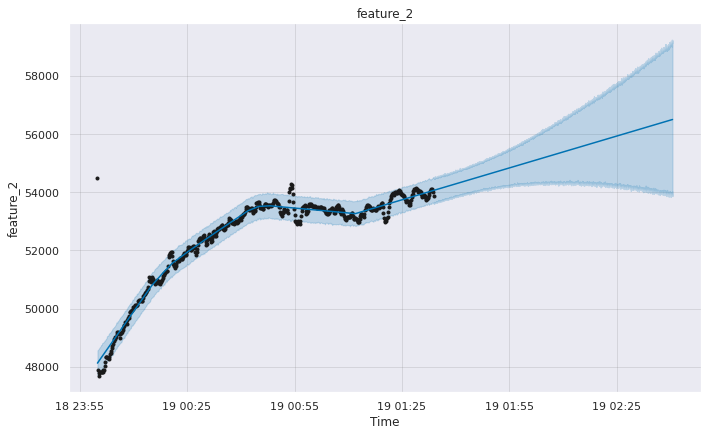

In [31]:
plt.figure(figsize=(18, 6))
model.plot(forecast,xlabel='Time',ylabel='feature_2')
plt.title('feature_2')

In [32]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-19 00:00:00,48126.567881,47714.758570,48568.206478,48126.567881,48126.567881,0.0,0.0,0.0,0.0,0.0,0.0,48126.567881
1,2019-03-19 00:00:10,48155.953919,47749.951176,48576.453622,48155.953919,48155.953919,0.0,0.0,0.0,0.0,0.0,0.0,48155.953919
2,2019-03-19 00:00:20,48185.339956,47770.686920,48614.785875,48185.339956,48185.339956,0.0,0.0,0.0,0.0,0.0,0.0,48185.339956
3,2019-03-19 00:00:30,48214.725994,47792.631932,48642.966576,48214.725994,48214.725994,0.0,0.0,0.0,0.0,0.0,0.0,48214.725994
4,2019-03-19 00:00:40,48244.112031,47807.515316,48675.486863,48244.112031,48244.112031,0.0,0.0,0.0,0.0,0.0,0.0,48244.112031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,2019-03-19 02:40:26,56501.460171,53939.317736,59140.428089,54000.024806,59108.303326,0.0,0.0,0.0,0.0,0.0,0.0,56501.460171
4560,2019-03-19 02:40:27,56502.069667,53950.091230,59244.606595,53999.627189,59109.894807,0.0,0.0,0.0,0.0,0.0,0.0,56502.069667
4561,2019-03-19 02:40:28,56502.679163,54034.922219,59154.905285,53999.229573,59111.486288,0.0,0.0,0.0,0.0,0.0,0.0,56502.679163
4562,2019-03-19 02:40:29,56503.288659,53866.521904,59140.316092,53998.831957,59113.077768,0.0,0.0,0.0,0.0,0.0,0.0,56503.288659


In [33]:
z=forecast[['ds','trend']] #Since we require ds and trend

In [34]:
z = z.rename(columns={'ds': 'time', 'trend': 'feature_2'})

**Here we are forecasting the value for each second for a long period. Thus we need to get the respective values only according to our test case.**

In [37]:
copy=df2[['time']] # To get the time frame in the test set 

Now we will create a dataframe containing only those forecasted values that we require.

In [38]:
arr = [np.array([z[k] == v for k, v in x.items()]).all(axis=0) for x in copy.to_dict('r')]
df3 = z[np.array(arr).any(axis=0)]

In [39]:
df3=df3.reset_index(drop=True) 

In [40]:
output2 = pd.DataFrame({'id': df2.id, 'feature_2': df3.feature_2}) # Creating Dataframe in the format required.

In [107]:
output2.to_csv('my_submission2.csv', index=False) # File for submission.

# **Next we will try Linear Regression after applying Logarithmic Transformation**

**A regression model will have unit changes between the x and y variables, where a single unit change in x will coincide with a constant change in y. Taking the log of one or both variables will effectively change the case from a unit change to a percent change.**

In [41]:
df=pd.read_csv('/kaggle/input/into-the-future/train.csv')
df2=pd.read_csv('/kaggle/input/into-the-future/test.csv')

In [42]:
df['time']=pd.to_datetime(df['time'])
df2['time']=pd.to_datetime(df2['time'])
df = df.set_index('time')
df2 = df2.set_index('time')

In [43]:
log_check = df[['id','feature_2']]
log_check = log_check[1:] # Exluding the oulier in feature_2 by removing the first row.

In [44]:
log_check['id_log'] = np.log1p(log_check.id) #Function to calculate natural logarithmic value of (log_check.id+1).

In [45]:
log_check.head(7)

,id,feature_2,id_log
time,,,
2019-03-19 00:00:10,1,47888.033714,0.693147
2019-03-19 00:00:20,2,47700.882325,1.098612
2019-03-19 00:00:30,3,47790.094648,1.386294
2019-03-19 00:00:40,4,47808.402381,1.609438
2019-03-19 00:00:50,5,47810.517411,1.791759
2019-03-19 00:01:00,6,47835.758121,1.945910
2019-03-19 00:01:10,7,47806.938481,2.079442


In [47]:
from sklearn.linear_model import LinearRegression

lr_log = LinearRegression()
lr_log.fit(log_check[['id_log']],log_check.feature_2) 

LinearRegression()

In [48]:
df2['id_log']=np.log1p(df2.id)
df2['feature_2']=lr_log.predict(df2[['id_log']])

We predicted 'feature_2'

In [49]:
df2['feature_2']

time
2019-03-19 01:34:00    54061.063935
2019-03-19 01:34:10    54063.895295
2019-03-19 01:34:20    54066.721657
2019-03-19 01:34:30    54069.543038
2019-03-19 01:34:40    54072.359457
                           ...     
2019-03-19 02:35:40    54867.588224
2019-03-19 02:35:50    54869.299751
2019-03-19 02:36:00    54871.009451
2019-03-19 02:36:10    54872.717327
2019-03-19 02:36:20    54874.423383
Name: feature_2, Length: 375, dtype: float64

In [50]:
df2=df2.reset_index(drop=True)

In [51]:
output3 = pd.DataFrame({'id': df2.id, 'feature_2': df2.feature_2})

In [54]:
output3 # Required Dataframe

,id,feature_2
0,564,54061.063935
1,565,54063.895295
2,566,54066.721657
3,567,54069.543038
4,568,54072.359457
...,...,...
370,934,54867.588224
371,935,54869.299751
372,936,54871.009451
373,937,54872.717327


In [53]:
output3.to_csv('my_submission3.csv', index=False) # File for submission.